# Problem: 

Use the following neural network topology to approximate the sine function.
Here, approximate means minimize the distance between your approximation $u$ and the function $\sin$ using the norm defined by 

$$\| f -g \| = \frac{1}{2}\sum_{i=0}^{99}(f(x_i)-g(x_i))^2$$
where $x_0, x_1, \ldots, x_{99}$ are one hundred points evenly spaced throughout the interval $[0,2\pi]$.

 $$ \begin{aligned} \nabla(\frac{1}{2} \| \mu(x)-\sin(x) \|) =
 \langle g,h \rangle * \langle
&\theta_{0,0}+x\theta_{1,0} - \cos(x), \theta_{0} - \cos(x), x\alpha_{0} - \cos(x),\\ 
 &\theta_{0,1}+x\theta_{1,1} - \cos(x), \alpha_{1} - \cos(x), x\alpha_{1} - \cos(x), \\
 &\theta_{0,2}+x\theta_{1,2} - \cos(x), \alpha_{2} - \cos(x), x\alpha_{2} - \cos(x), \\
 &\theta_{0,3}+x\theta_{1,3} - \cos(x), \alpha_{3} - \cos(x), x\alpha_{3} - \cos(x) \rangle \end{aligned} $$

In [1]:
import math
from sympy import *
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

$$C(\alpha^0,\alpha^1,\alpha^2,\alpha^3,\theta_0^0,\theta_0^1,\theta_0^2,\theta_0^3,\theta_1^0,\theta_1^1,\theta_1^2,\theta_1^3,\theta_2^0,\theta_2^1,\theta_2^2,\theta_2^3) = \frac{1}{2}\sum_{x = 0}^{100} (\mu(x) - \sin(x))^2 $$
$$ \mu(x) = \alpha^0 \sigma(\theta_0^0 + \theta_1^0x) + \alpha^1 \sigma(\theta_0^1 + \theta_1^1x) + \alpha^2 \sigma(\theta_0^2 + \theta_1^2x) + \alpha^3 \sigma(\theta_0^3 + \theta_1^3x) $$ 
where $$\sigma(x) = \frac{1}{1 + e^{-x}} $$

Partial Derivatives: 
$$ \begin{aligned} 
\frac{\partial C}{\partial \alpha^0} = (\mu(x) - \sin(x))\sigma(\theta_0^0 + \theta_1^0x) ~~~
\frac{\partial C}{\partial \theta_0^0} &= \frac{\alpha^0(\mu(x) - \sin(x))e^{\theta_0^0 + x\theta_1^0}}{(1 + e^{\theta_0^0 + x\theta_1^0})^2} ~~~
\frac{\partial C}{\partial \theta_1^0} = \frac{x\alpha^0(\mu(x) - \sin(x))e^{\theta_0^0 + x\theta_1^0}}{(1 + e^{\theta_0^0 + x\theta_1^0})^2} \\
\frac{\partial C}{\partial \alpha^1} = (\mu(x) - \sin(x))\sigma(\theta_0^1 + \theta_1^1x) ~~~
\frac{\partial C}{\partial \theta_0^1} &= \frac{\alpha^0(\mu(x) - \sin(x))e^{\theta_0^1 + x\theta_1^1}}{(1 + e^{\theta_0^1 + x\theta_1^1})^2} ~~~
\frac{\partial C}{\partial \theta_1^1} = \frac{x\alpha^0(\mu(x) - \sin(x))e^{\theta_0^1 + x\theta_1^1}}{(1 + e^{\theta_0^1 + x\theta_1^1})^2} \\
\frac{\partial C}{\partial \alpha^2} = (\mu(x) - \sin(x))\sigma(\theta_0^2 + \theta_1^2x) ~~~
\frac{\partial C}{\partial \theta_0^2} &= \frac{\alpha^0(\mu(x) - \sin(x))e^{\theta_0^2 + x\theta_1^2}}{(1 + e^{\theta_0^2 + x\theta_1^2})^2} ~~~
\frac{\partial C}{\partial \theta_1^2} = \frac{x\alpha^0(\mu(x) - \sin(x))e^{\theta_0^2 + x\theta_1^2}}{(1 + e^{\theta_0^2 + x\theta_1^2})^2} \\
\frac{\partial C}{\partial \alpha^3} = (\mu(x) - \sin(x))\sigma(\theta_0^3 + \theta_1^3x) ~~~
\frac{\partial C}{\partial \theta_0^3} &= \frac{\alpha^0(\mu(x) - \sin(x))e^{\theta_0^3 + x\theta_1^3}}{(1 + e^{\theta_0^3 + x\theta_1^3})^2} ~~~
\frac{\partial C}{\partial \theta_1^3} = \frac{x\alpha^0(\mu(x) - \sin(x))e^{\theta_0^3 + x\theta_1^3}}{(1 + e^{\theta_0^3 + x\theta_1^3})^2} \end{aligned} $$ 

Let's define two exponential function to tidy up our code: $$ \text{expOne}(x,y,z) = e^{(y + zx)}$$ $$ \text{expTwo}(x,y,z) = e^{-(y + zx)} $$
Therefore our sigmoid function is: $$ \sigma(x,y,z) = \frac{1}{1 + \text{expTwo}(x,y,z)} $$

In [4]:
def expOne(x,y,z):
    return (math.exp(y + (z*x)))

In [5]:
def expTwo(x,y,z):
    return (math.exp(-1 * (y + z*x)))

In [6]:
def sigmoid(x,y,z):
    return (1 + expTwo(x,y,z))**-1

The 12 variables and its gradient will be stored as follows: $$ \begin{bmatrix} \alpha^0 & \alpha^1 & \alpha^2 & \alpha^3 \\ \theta_0^0 & \theta_0^1 & \theta_0^2 & \theta_0^3 \\ \theta_1^0 & \theta_1^1 & \theta_1^2 & \theta_1^3 \end{bmatrix} ~~~ \begin{bmatrix} \frac{\partial C}{\partial \alpha^0} & \frac{\partial C}{\partial \alpha^1} & \frac{\partial C}{\partial \alpha^2} & \frac{\partial C}{\partial \alpha^3} \\ \frac{\partial C}{\partial \theta_0^0} & \frac{\partial C}{\partial \theta_0^1} & \frac{\partial C}{\partial \theta_0^2} & \frac{\partial C}{\partial \theta_0^3} \\ \frac{\partial C}{\partial \theta_1^0} & \frac{\partial C}{\partial \theta_1^1} & \frac{\partial C}{\partial \theta_1^2} & \frac{\partial C}{\partial \theta_1^3} \end{bmatrix} $$ 

In [7]:
var = np.array([[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]])

In [8]:
def mu(x,var_arr):

    y = 0
    for i in range(4):
        y += var_arr[0][i] * sigmoid(x, var_arr[1][i], var_arr[2][i])
    return y

In [9]:
def gradient(var_arr):

    grad_arr = np.zeros((3,4))
    interval = np.linspace(0,2*np.pi, 100)

    for x in interval:
        value = mu(x, var_arr) - np.sin(x)
        for i in range(4):
            grad_arr[0][i] += (value * sigmoid(x,var_arr[1][i],var_arr[2][i]))
            temp = expOne(x,var_arr[1][i],var_arr[2][i])
            tempTwo = (value * temp * var_arr[0][i]) / ((1 + temp)**2)
            grad_arr[1][i] += tempTwo
            grad_arr[2][i] += x * tempTwo

    return grad_arr

In [10]:
def cost(var_arr):

    output = 0.0
    interval = np.linspace(0,2*np.pi, 100)

    for i in interval:
        output += (mu(i,var_arr) - np.sin(i))**2
    return 0.5*output

In [11]:
a_old = np.random.rand(3,4)
h = 0.001
max_steps = 1000
tolerance = 0.0001

print("Initial Cost: ", cost(a_old))
print("The initial randomized guesses for the constants of the neural network are: ")
for a in range(4):
    print("alpha_",a, " = ", a_old[0][a])
for b in range(4):
    print("theta_0^",b, " = ", a_old[1][b])
for c in range(4):
    print("theta_1^",c, " = ", a_old[2][c])

a_new = a_old - h * gradient(a_old)

for i in range(max_steps):
    if(cost(a_old) - cost(a_new) <= tolerance):
        print("Tolerance has been reached.")
        break
    if(cost(a_old) < cost(a_new)):
        a_new = a_old
        break
    a_old = a_new
    direction = -1 * gradient(a_old)
    a_new = a_old + (h * direction)

print("Final Cost: ", cost(a_new))
print("The constants for the neural network are: ")
for j in range(4):
    print("alpha_",j, " = ", a_new[0][j])
for k in range(4):
    print("theta_0^",k, " = ", a_new[1][k])
for l in range(4):
    print("theta_1^",l, " = ", a_new[2][l])


Initial Cost:  152.853831491
The initial randomized guesses for the constants of the neural network are: 
alpha_ 0  =  0.0392138049872
alpha_ 1  =  0.935069395134
alpha_ 2  =  0.801182370268
alpha_ 3  =  0.390018826213
theta_0^ 0  =  0.0188524897848
theta_0^ 1  =  0.197230919153
theta_0^ 2  =  0.634132031231
theta_0^ 3  =  0.312030611177
theta_1^ 0  =  0.993622193055
theta_1^ 1  =  0.0370337938615
theta_1^ 2  =  0.296799684981
theta_1^ 3  =  0.500139221653
Final Cost:  9.58989159705
The constants for the neural network are: 
alpha_ 0  =  -0.799642639001
alpha_ 1  =  1.38572323448
alpha_ 2  =  0.876066461282
alpha_ 3  =  -0.466035521721
theta_0^ 0  =  -0.296995959199
theta_0^ 1  =  0.849889195078
theta_0^ 2  =  0.956045320777
theta_0^ 3  =  0.2279725582
theta_1^ 0  =  0.310373091075
theta_1^ 1  =  -0.451726089816
theta_1^ 2  =  -0.484716188143
theta_1^ 3  =  0.249518501377


In [12]:
x_0 = np.linspace(0, 2 * np.pi,100)
y_0 = []
y_1 = []
for p in x_0:
    y_0.append(mu(p,a_new))
    y_1.append(np.sin(p))

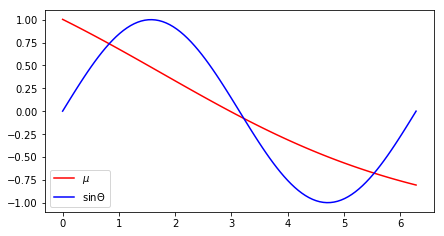

In [16]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.7])
axes.plot(x_0,y_0,label ="$\mu$",c = "red");
axes.plot(x_0,y_1, label = "$\sin\Theta$", c = "blue");
axes.legend(loc = 3);

A function of 12 variables that are related to each other by a neural network is approximated to the $\sin$ function here much better than before (a straight line at $y = 0$). The endpoints are not as close to the $\sin$ function as hoped for but a better algorithm can fix it, perhaps using stochastic gradient descent. If the max steps is changed to $10000$, the function becomes much much closer to the $\sin$ function, even at the endpoints, but at the expense of time.